Prediction(予測) House Pricesのコンペのデータ解析を実施します。

In [3]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
 
train = pd.read_csv('dataset/train.csv') #学習データ
test = pd.read_csv('dataset/test.csv') #テストデータ
print('The size of the train data:' + str(train.shape))
print('The size of the test data:' + str(test.shape))

The size of the train data:(1460, 81)
The size of the test data:(1459, 80)


In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [7]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [63]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [64]:
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

In [65]:
test.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object


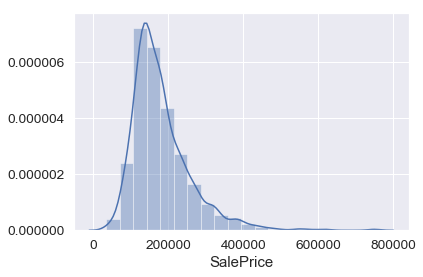

In [20]:
sns.distplot(train['SalePrice'],bins=20,label='SalePrice')

データ見てみてわかったこと

・SalesPriceは正規分布している。

・説明変数多すぎる。

・欠損値多いカラム多い。

・名義変数多い。

よくわからんので最初は連続変数のデータのみを使って、相関行列作って効いてる特徴量探しましょう。

<function matplotlib.pyplot.show(*args, **kw)>

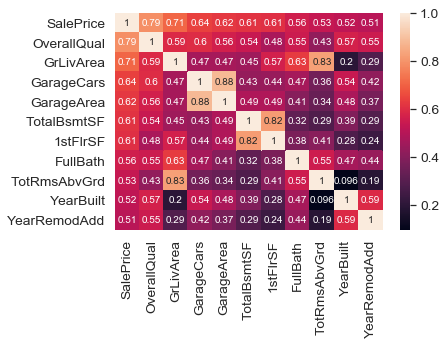

In [45]:

corrmat=train.corr()

#k= 15 #15ですると欠損値が表示されたため11にする。
k=11
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index

cm = np.corrcoef(train[cols].values.T)


#sns.set(font_scale = 1.25)
#sns.heatmap(cm, cbar=True, annot=True, square=True, annot_kws={'size':8},yticklabels=cols.values,xticklabels=cols.values)
sns.heatmap(cm, annot=True, annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)
plt.show

SalesPriceに相関が高いのは下記の特徴量（R^2<0.76)

OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF

それぞれの特徴量の分布とチェックします。

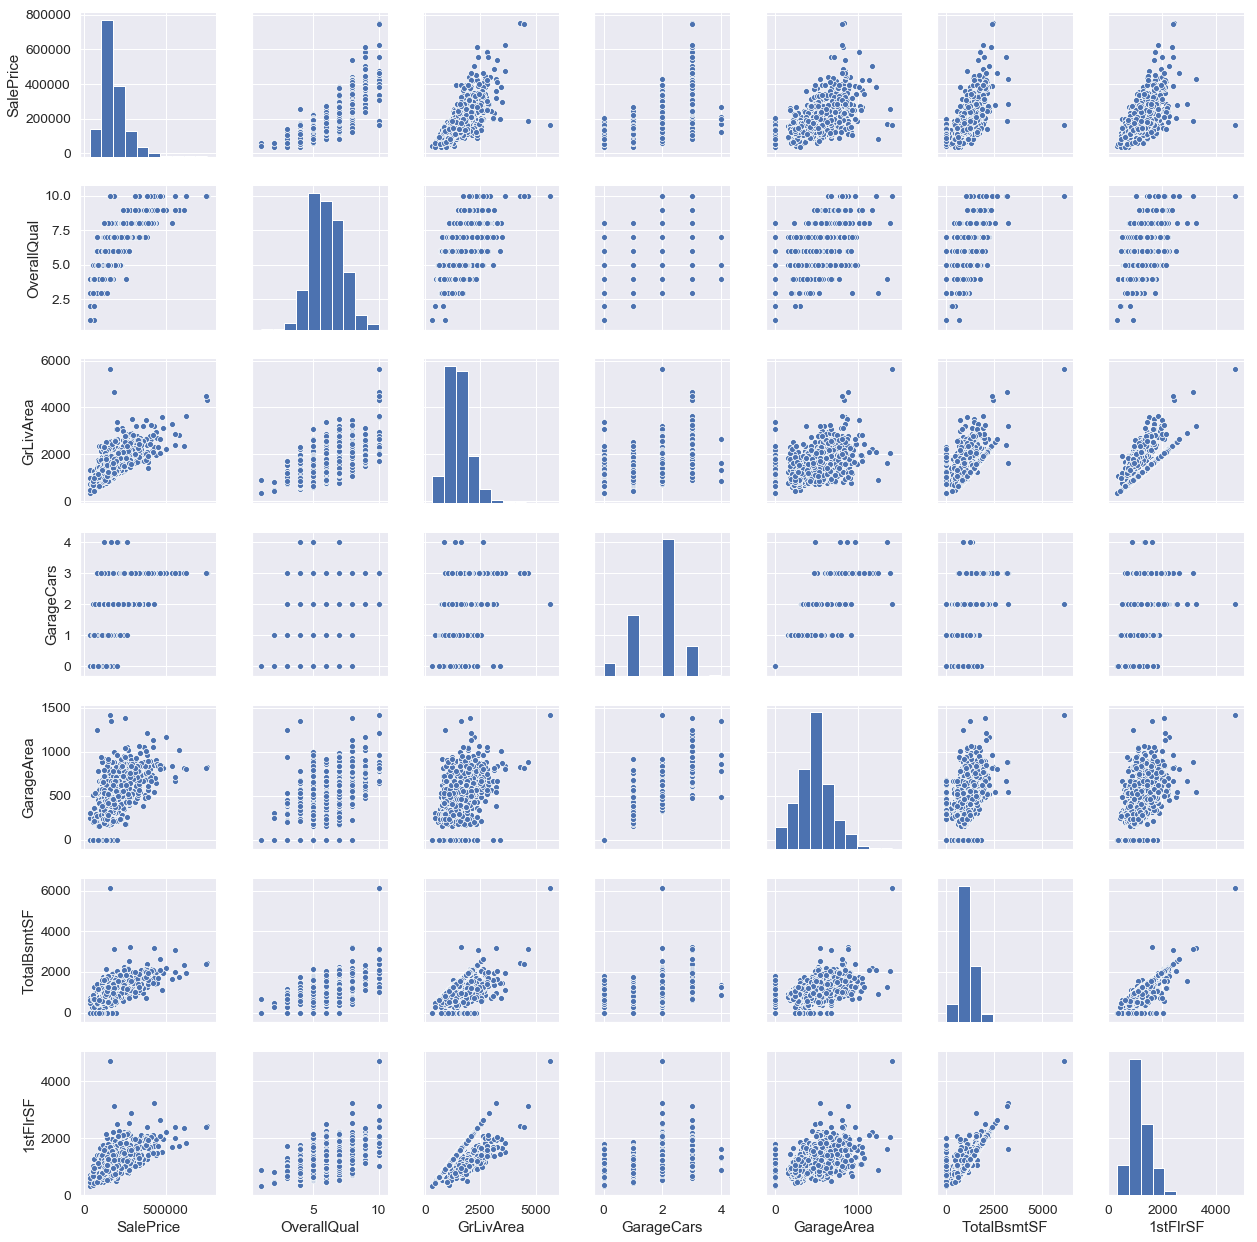

In [27]:
cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF']

sns.pairplot(train[cols])

とりあえず、

OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF

を利用して、回帰分析します。

アルゴリズムはランダムフォレスト、XGBoost、Lightgbmでやります。 

In [77]:

from sklearn.ensemble import RandomForestRegressor as RFR
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#教師データの目的変数の設定
y_train = train['SalePrice']
#教師データの説明変数の設定
X_train = train[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF']].values
#テストデータの説明変数
X_test = test[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF']].values

#テストデータから外れ値を削除
#X_test.drop(X_testX.columns[np.isnan(X).any()], axis=1)
X_test=np.nan_to_num(X_test)

#ランダムフォレスト
rg = RFR(n_jobs=-1, n_estimators=100)
rg.fit(X_train,y_train)

train_predict_y = rg.predict(X_train)
test_predict_y = rg.predict(X_test)

#r2_score = r2_score(y_test, predict_y)
#r2_score = r2_score(y_test, predict_y)


In [69]:
#予測モデルから出力した結果
predict_y

array([122867.66      , 159153.        , 151308.4       , ...,
       160333.85      , 101622.98333333, 237025.51      ])

In [72]:
#testにSalePriceカラム追加し、予測結果を貼り付け
test["SalePrice"] = predict_y

In [74]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,122867.660000
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,159153.000000
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,151308.400000
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,181424.000000
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,229237.360000
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,177292.400000
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal,163848.000000
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,175616.650000
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,182934.800000
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal,111098.510000


In [79]:
y_test = test['SalePrice']

In [80]:
from sklearn.metrics import mean_squared_error
print("MSE train: %.3f, test: %.3f" % (mean_squared_error(y_train, train_predict_y), 
                                       mean_squared_error(y_test, test_predict_y)))
train_predict_y
#　R^2の出力
from sklearn.metrics import r2_score
print("R^2 train: %.3f, test: %.3f" % (r2_score(y_train, train_predict_y), 
                                       r2_score(y_test, test_predict_y)))

MSE train: 165028209.379, test: 17815828.678
R^2 train: 0.974, test: 0.997


決定係数　99.7%

確実に過学習してますねぇ。。。
とりあえずKaggleに提出してみます。

In [83]:
#予測結果の出力
# Id取得
Id = np.array(test["Id"]).astype(int)

#予測データとIdをデータフレームへ落とし込む
my_rf_solution = pd.DataFrame(test_predict_y, Id, columns = ["SalePrice"])

# csvに書き出し
my_rf_solution.to_csv("my_rfr_1.csv", index_label = ["Id"])

〇結果

ランダムフォレスト　パラメータ調整なし

Score　0.17405
順位　3064位/4513位　中

ぜんぜんでした笑

改善点としては

・連続変数以外の特徴量活用してない（EDAしてない）
・パラメータチューニングしてない
・外れ値抜いてない

などがあげられるかと思います。
上記を次回までに改善して得点アップ目指します。

In [87]:

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor



 
xgb = XGBRegressor(random_state=0)
xgb.fit(X_train, y_train)
print('='*20)
print('XGBRegressor')
print(f'accuracy of train set: {xgb.score(X_train, y_train)}')
print(f'accuracy of train set: {xgb.score(X_test, y_test)}')
 
lgb = LGBMRegressor(random_state=0)
lgb.fit(X_train, y_train)
print('='*20)
print('LGBMRegressor')
print(f'accuracy of train set: {lgb.score(X_train, y_train)}')
print(f'accuracy of train set: {lgb.score(X_test, y_test)}')
 
#lr = LogisticRegression(random_state=0)
#lr.fit(X_train, y_train)
#print('='*20)
#print('LogisticRegression')
#print(f'accuracy of train set: {lr.score(X_train, y_train)}')
#print(f'accuracy of train set: {lr.score(X_test, y_test)}')
 
#svc = SVC(random_state=0)
#svc.fit(X_train, y_train)
#print('='*20)
#print('SVC')
#print(f'accuracy of train set: {svc.score(X_train, y_train)}')
#print(f'accuracy of train set: {svc.score(X_test, y_test)}')

C:\Users\takes\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\takes\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[15:09:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor
accuracy of train set: 0.9139661452548693
accuracy of train set: 0.9727045825186559
LGBMRegressor
accuracy of train set: 0.9326628052746081
accuracy of train set: 0.9719006795122016


In [ ]:

from sklearn.ensemble import RandomForestRegressor as RFR
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#教師データの目的変数の設定
y_train = train['SalePrice']
#教師データの説明変数の設定
X_train = train[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF']].values
#テストデータの説明変数
X_test = test[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF']].values

#テストデータから外れ値を削除
#X_test.drop(X_testX.columns[np.isnan(X).any()], axis=1)
X_test=np.nan_to_num(X_test)

#ランダムフォレスト
xgb = RFR(n_jobs=-1, n_estimators=100)
xgb.fit(X_train,y_train)

train_predict_y_xgb = rg.predict(X_train)
test_predict_y_xgb = rg.predict(X_test)






In [90]:
#予測結果の出力
# Id取得
Id = np.array(test["Id"]).astype(int)

#予測データとIdをデータフレームへ落とし込む
my_xgbr_solution = pd.DataFrame(test_predict_y, Id, columns = ["SalePrice"])
# csvに書き出し
my_xgbr_solution.to_csv("my_rfr_1.csv", index_label = ["Id"])

#予測データとIdをデータフレームへ落とし込む
my_xgbr_solution = pd.DataFrame(test_predict_y, Id, columns = ["SalePrice"])
# csvに書き出し
my_xgbr_solution.to_csv("my_rfr_1.csv", index_label = ["Id"])


以下補足資料

In [99]:
test_predict_y[1:]

array([161134.22      , 146202.        , 182240.5       , ...,
       155064.22      , 100262.56666667, 236355.37      ])

In [101]:
y_test.columns

AttributeError: 'Series' object has no attribute 'columns'

In [81]:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
 
#予測値と正解値を描写する関数
def True_Pred_map(rg):
    RMSE = np.sqrt(mean_squared_error(rg['true'], rg['pred']))
    R2 = r2_score(rg['true'], rg['pred']) 
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111)
    ax.scatter('true', 'pred', data=rg)
    ax.set_xlabel('True Value', fontsize=15)
    ax.set_ylabel('Pred Value', fontsize=15)
    ax.set_xlim(rg.min().min()-0.1 , rg.max().max()+0.1)
    ax.set_ylim(rg.min().min()-0.1 , rg.max().max()+0.1)
    x = np.linspace(rg.min().min()-0.1, prergd_df.max().max()+0.1, 2)
    y = x
    ax.plot(x,y,'r-')
    plt.text(0.1, 0.9, 'RMSE = {}'.format(str(round(RMSE, 5))), transform=ax.transAxes, fontsize=15)
    plt.text(0.1, 0.8, 'R^2 = {}'.format(str(round(R2, 5))), transform=ax.transAxes, fontsize=15)
    
    rg = pd.concat([y_test.reset_index(drop=True), pd.Series(predicted)], axis=1)
    rg.columns = ['true', 'pred']
    
    rg.head()

In [82]:
X_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [57]:
test.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
5     1466          60       RL         75.0    10000   Pave   NaN      IR1   
6     1467          20       RL          NaN     7980   Pave   NaN      IR1   
7     1468          60       RL         63.0     8402   Pave   NaN      IR1   
8     1469          20       RL         85.0    10176   Pave   NaN      Reg   
9     1470          20       RL         70.0     8400   Pave   NaN      Reg   
10    1471         120       RH         26.0     5858   Pave   NaN      IR1   
11    1472         160

In [58]:
train.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60

In [62]:
X_test.dtypes

AttributeError: 'numpy.ndarray' object has no attribute 'dtypes'